<a href="https://colab.research.google.com/github/dtylor/WalkRNN/blob/master/GraphLM_walk_AIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/dtylor/WalkRNN.git
%cd WalkRNN
!ls

Cloning into 'WalkRNN'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 363 (delta 18), reused 0 (delta 0), pack-reused 326
Receiving objects: 100% (363/363), 1.36 MiB | 16.33 MiB/s, done.
Resolving deltas: 100% (198/198), done.
/content/WalkRNN
AIDS			      graphwave		     n2v
Cuneiform		      __init__.py	     OrgChart.ipynb
data			      LICENSE-3RD-PARTY.txt  README.md
Demonstration.ipynb	      LICENSE.md	     test.py
GraphLM_walk_AIDS.ipynb       module.py		     TODO
GraphLM_walk_AIDS.py	      Motivation.ipynb	     utilities.py
GraphLM_walk_CUNEIFORM.ipynb  MUTAG.ipynb


In [2]:
 !curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   287  100   287    0     0   1816      0 --:--:-- --:--:-- --:--:--  1816
bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">'


In [0]:
import fastai
import pandas as pd

In [4]:
from fastai.utils.show_install import *
show_install()



```text
=== Software === 
python        : 3.6.8
fastai        : 1.0.57
fastprogress  : 0.1.21
torch         : 1.1.0
nvidia driver : 418.67
torch cuda    : 10.0.130 / is available
torch cudnn   : 7501 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 11441MB | Tesla K80

=== Environment === 
platform      : Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Thu Aug 8 02:47:02 PDT 2019
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be installed with:
pip install distro
Once installed, re-run t

In [5]:
str(fastai.__dict__['version'])
!more /usr/local/lib/python3.6/dist-packages/fastai/version.py

__all__ = ['__version__']
__version__ = '1.0.57'


In [6]:
!ls

AIDS			      graphwave		     n2v
Cuneiform		      __init__.py	     OrgChart.ipynb
data			      LICENSE-3RD-PARTY.txt  README.md
Demonstration.ipynb	      LICENSE.md	     test.py
GraphLM_walk_AIDS.ipynb       module.py		     TODO
GraphLM_walk_AIDS.py	      Motivation.ipynb	     utilities.py
GraphLM_walk_CUNEIFORM.ipynb  MUTAG.ipynb


In [0]:
from google.colab import drive

In [8]:
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
from utilities import load_graph_kernel_graph, load_graph_kernel_labels

node_mappings = [{
        0:       "C",
        1:       "O",
        2:       "N",
        3:       "Cl",
        4:       "F",
        5:       "S",
        6:       "Se",
        7:       "P",
        8:       "Na",
        9:       "I",
        10:      "Co",
        11:      "Br",
        12:      "Li",
        13:      "Si",
        14:      "Mg",
        15:      "Cu",
        16:      "As",
        17:      "B",
        18:      "Pt",
        19:      "Ru",
        20:      "K",
        21:      "Pd",
        22:      "Au",
        23:      "Te",
        24:      "W",
        25:      "Rh",
        26:      "Zn",
        27:      "Bi",
        28:      "Pb",
        29:      "Ge",
        30:      "Sb",
        31:      "Sn",
        32:      "Ga",
        33:      "Hg",
        34:      "Ho",
        35:      "Tl",
        36:      "Ni",
        37:      "Tb"
}]

label_maps={"node_labels": node_mappings}

G = load_graph_kernel_graph("./AIDS", mappings=label_maps,params={'num_kmeans_clusters': 4, "num_pca_components": 6, "num_batch":500, 'num_att_kmeans_clusters': 5})
y = load_graph_kernel_labels("./AIDS")


finished graphwave_alg batches
DONE


In [0]:
import matplotlib.pyplot as plt
import networkx as nx
# create number for each group to allow use of colormap
from itertools import count


def plotGW(tmpG, comp_no):
 # get unique groups
 groups = set(nx.get_node_attributes(tmpG,'structure').values())

 mapping = dict(zip(sorted(groups),count()))
  
 comp_nodes = [x for x,y in tmpG.nodes(data=True) if y['component']==comp_no]
 print(len(comp_nodes))
 subgraph = tmpG.subgraph(comp_nodes)
 nodes = subgraph.nodes()
 colors = [mapping[subgraph.node[n]['structure']] for n in nodes]

 # drawing nodes and edges separately so we can capture collection for colobar
 pos = nx.spring_layout(subgraph)
 ec = nx.draw_networkx_edges(subgraph, pos, with_labels=True,alpha=0.2)
 nc = nx.draw_networkx_nodes(subgraph, pos, nodelist=nodes, node_color=colors, 
                            with_labels=True, node_size=100, cmap=plt.cm.jet, vmin=0,vmax=3)
 plt.colorbar(nc)
 plt.axis('off')
 plt.show()
 print(nx.get_node_attributes(subgraph,'structure'))
 

47


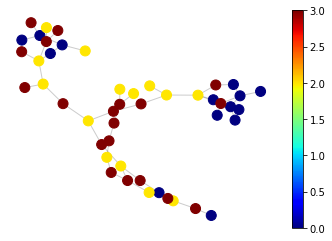

{1: 52, 2: 53, 3: 53, 4: 52, 5: 53, 6: 53, 7: 53, 8: 50, 9: 52, 10: 52, 11: 53, 12: 53, 13: 53, 14: 53, 15: 52, 16: 52, 17: 53, 18: 50, 19: 50, 20: 50, 21: 50, 22: 53, 23: 52, 24: 52, 25: 53, 26: 53, 27: 52, 28: 52, 29: 52, 30: 53, 31: 50, 32: 50, 33: 50, 34: 50, 35: 53, 36: 50, 37: 52, 38: 53, 39: 52, 40: 50, 41: 50, 42: 52, 43: 53, 44: 53, 45: 50, 46: 53, 47: 50}


In [11]:

plotGW(G,1)

11


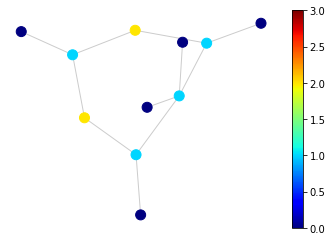

{48: 52, 49: 51, 50: 52, 51: 51, 52: 51, 53: 51, 54: 50, 55: 50, 56: 50, 57: 50, 58: 50}


In [12]:
plotGW(G,2)

9


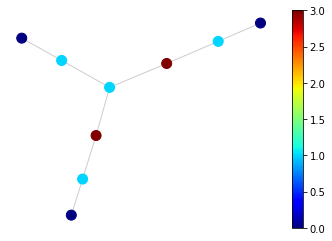

{64: 50, 65: 53, 66: 51, 67: 50, 59: 51, 60: 51, 61: 50, 62: 53, 63: 51}


In [13]:
plotGW(G,3)

11


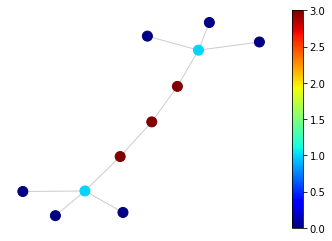

{3717: 53, 3718: 51, 3719: 53, 3720: 50, 3721: 50, 3722: 50, 3723: 53, 3724: 51, 3725: 50, 3726: 50, 3727: 50}


In [14]:
plotGW(G,251)

76


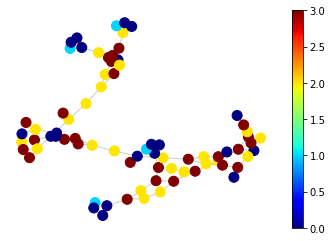

{150: 53, 151: 53, 152: 52, 153: 52, 154: 53, 155: 53, 156: 52, 157: 53, 158: 52, 159: 52, 160: 52, 161: 53, 162: 50, 163: 53, 164: 52, 165: 53, 166: 52, 167: 53, 168: 50, 169: 52, 170: 53, 171: 50, 172: 53, 173: 53, 174: 52, 175: 53, 176: 52, 177: 52, 178: 53, 179: 50, 180: 51, 181: 50, 182: 50, 183: 50, 184: 51, 185: 50, 186: 50, 187: 50, 188: 50, 189: 53, 190: 53, 191: 52, 192: 52, 193: 53, 194: 53, 195: 52, 196: 53, 197: 52, 198: 52, 199: 52, 200: 53, 201: 50, 202: 53, 203: 52, 204: 53, 205: 52, 206: 53, 207: 50, 208: 52, 209: 53, 210: 50, 211: 53, 212: 53, 213: 52, 214: 53, 215: 52, 216: 52, 217: 51, 218: 50, 219: 50, 220: 50, 221: 51, 222: 50, 223: 50, 224: 50, 225: 50}


In [15]:
plotGW(G,11)

12


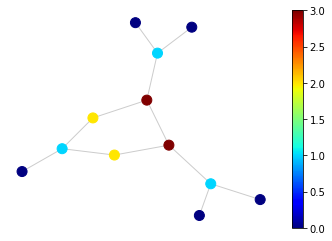

{3823: 53, 3824: 52, 3825: 51, 3826: 52, 3827: 53, 3828: 51, 3829: 50, 3830: 50, 3831: 51, 3832: 50, 3833: 50, 3834: 50}


In [16]:
plotGW(G,260)

9


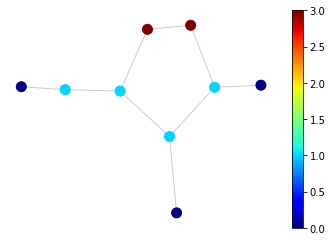

{299: 53, 300: 51, 301: 51, 302: 51, 303: 53, 304: 50, 305: 51, 306: 50, 307: 50}


In [17]:
plotGW(G,18)

24


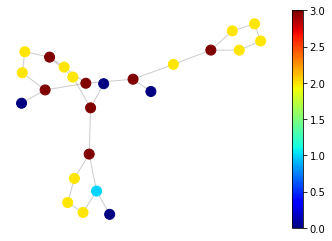

{1994: 52, 1995: 52, 1996: 51, 1997: 53, 1998: 52, 1999: 53, 2000: 50, 2001: 52, 2002: 53, 2003: 52, 2004: 53, 2005: 53, 2006: 52, 2007: 52, 2008: 50, 2009: 53, 2010: 50, 2011: 52, 2012: 53, 2013: 52, 2014: 52, 2015: 52, 2016: 52, 2017: 50}


In [18]:
plotGW(G,140)

In [0]:
from module import walk_as_string

In [20]:
walks = walk_as_string(G, componentLabels = y)

Walk iteration:
('1', '/', '20')
('2', '/', '20')
('3', '/', '20')
('4', '/', '20')
('5', '/', '20')
('6', '/', '20')
('7', '/', '20')
('8', '/', '20')
('9', '/', '20')
('10', '/', '20')
('11', '/', '20')
('12', '/', '20')
('13', '/', '20')
('14', '/', '20')
('15', '/', '20')
('16', '/', '20')
('17', '/', '20')
('18', '/', '20')
('19', '/', '20')
('20', '/', '20')


/content/WalkRNN/module.py:140: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sorted_walks = pd.DataFrame(walks).sort_values(0).as_matrix()


[ 1  6  5  6  5  4  7  4  3  2  1  6  5  4  7  4  7  8  9 46 47 46 47 46  9 46  9 46  9 46]
[ 1  2 12 13 27 13 27 13 12 13 14 38 37 38 14 38 37 29 37 39 37 29 34 33 34 29 34 33 36 33]
[ 1  6  1  2 12 13 12  2  1  6  5 10  5  4  7  8  9 10  9 46 47 46  9 46 47 46 47 46 47 46]


In [0]:
from fastai.text import *
from sklearn.model_selection import train_test_split
import numpy

In [22]:
walks.head()

,walk,label,start_node,component
0,4 5 41 45 52 56 60 4 5 41 45 53 56 59 0 5 41 4...,0,1,1
1,4 5 41 45 52 56 59 4 5 41 45 53 56 59 4 6 41 4...,0,1,1
2,4 5 41 45 52 56 60 4 5 41 45 53 56 60 4 5 41 4...,0,1,1
3,4 5 41 45 52 56 59 4 5 41 45 53 56 59 4 5 41 4...,0,1,1
4,4 5 41 45 52 56 60 4 5 41 45 53 56 60 4 5 41 4...,0,1,1


In [23]:
walks.shape

(623500, 4)

In [0]:
from sklearn.model_selection import train_test_split
import numpy
data = list(set(walks.component))
x_traina ,x_test = train_test_split(data,test_size=0.1)    
x_train ,x_val = train_test_split(x_traina,test_size=0.2)  


In [25]:
train_tmp = pd.DataFrame(x_train)
train_tmp.columns = ['component']
df_train = pd.merge(walks, train_tmp, on='component', sort=False)
df_train.shape

(436740, 4)

In [26]:
test_tmp = pd.DataFrame(x_test)
test_tmp.columns = ['component']
df_test = pd.merge(walks, test_tmp, on='component', sort=False)
df_test.shape

(69260, 4)

In [27]:
val_tmp = pd.DataFrame(x_val)
val_tmp.columns = ['component']
df_val = pd.merge(walks, val_tmp, on='component', sort=False)
df_val.shape

(117500, 4)

In [0]:
!mkdir result
mypath = './result'

In [0]:
data_lm = TextLMDataBunch.from_df(train_df=df_train[['walk', 'label']], valid_df=df_val[[
                                  'walk', 'label']],  path=mypath, text_cols='walk', label_cols='label')


In [0]:
data_lm.save('data_lm.pkl')

In [31]:
!ls -l ./result

total 1232412
-rw-r--r-- 1 root root 1261984649 Sep 28 03:44 data_lm.pkl


In [0]:
bs = 32
# load the data (can be used in the future as well to prevent reprocessing)
data_lm = load_data(mypath, 'data_lm.pkl', bs=bs)


In [33]:
data_lm.show_batch() # take a look at the batch fed into the GPU

idx,text
0,59 4 5 41 45 52 56 60 4 5 41 45 53 56 59 0 5 41 45 53 56 60 0 5 41 45 52 56 59 0 6 41 45 53 56 59 0 5 41 45 52 56 59 0 6 41 45 53 56 59 0 5 41 45 50 56 59 0 5 41 45 52 56 59 0 6 41 45 53 56
1,53 55 59 1 5 41 45 52 55 59 1 5 41 45 53 55 59 2 5 41 45 51 55 59 1 5 41 45 53 55 59 1 5 41 45 50 55 59 1 5 41 45 53 55 59 1 5 41 45 50 55 59 1 5 41 45 53 55 59 1 5 41 45 50 55 59 1 5 41 45
2,40 45 52 54 60 0 7 40 45 52 54 60 0 7 40 45 52 54 59 0 5 41 45 53 57 60 0 5 41 45 53 57 59 0 5 41 45 52 57 60 0 7 40 45 52 57 59 0 7 40 45 52 57 60 2 5 41 45 53 57 59 0 5 41 45 53 57 60 0 5
3,0 10 40 45 51 54 59 0 6 41 45 50 57 59 0 10 40 45 51 54 59 0 6 41 45 50 57 59 0 10 40 45 51 54 60 0 6 41 45 50 54 60 0 10 40 45 51 54 59 0 6 41 45 50 57 59 0 10 40 45 51 54 xxbos 4 6 41 45 50 57 60
4,60 0 10 40 45 51 57 59 2 5 41 45 53 57 59 0 5 41 45 53 54 59 2 5 41 45 53 57 59 0 10 40 45 51 57 xxbos 2 5 41 45 50 54 59 0 17 42 45 51 54 59 2 5 41 45 53 54 59 0 5 41 45 53 54 59 2 5 41 45 53 57


In [0]:
awd_lstm_lm_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.1, hidden_p=0.15, input_p=0.25, embed_p=0.02, weight_p=0.2, tie_weights=True, out_bias=True)
awd_lstm_clas_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.4,  hidden_p=0.3, input_p=0.4, embed_p=0.05, weight_p=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.368526,0.339708,0.861037,23:11


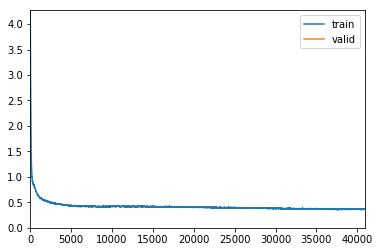

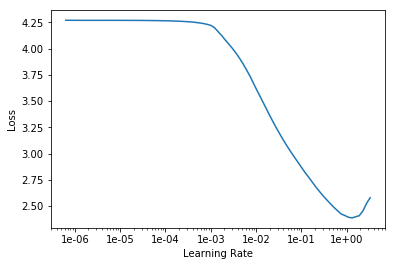

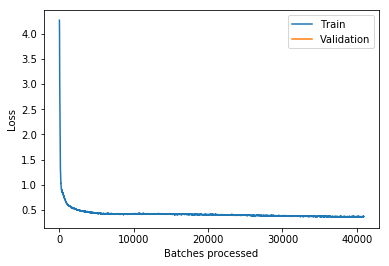

In [35]:

learn = language_model_learner(data_lm,arch=AWD_LSTM,config= awd_lstm_lm_config,drop_mult=1.9, callback_fns=ShowGraph,pretrained=False)
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.recorder.plot_losses()
learn.save('fit-head')



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


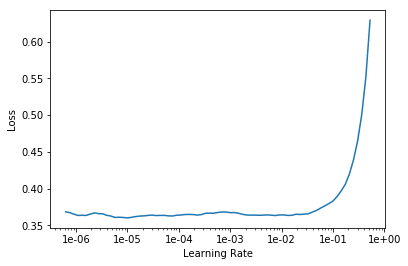

In [36]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.392921,0.358699,0.856413,23:08
1,0.345382,0.331959,0.864703,23:12


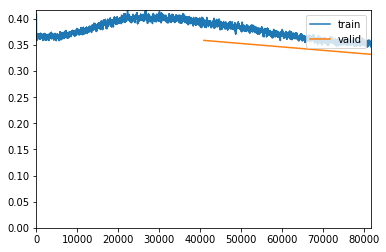

In [37]:
learn.fit_one_cycle(2, .01, moms=(0.8,0.7))

In [0]:
learn.save('fit-head')

In [0]:
learn.save_encoder('fine_tuned_enc3')

In [40]:
df = walks.sample(frac=1).reset_index(drop=True)
df['index1']=df.index

g = df.groupby('component')
df['RN'] = g['index1'].rank(method='min')

df[df['component']==1].head()


,walk,label,start_node,component,index1,RN
653,0 5 41 45 53 57 59 0 5 41 45 52 54 59 0 5 41 4...,0,35,1,653,1.0
941,0 6 41 45 53 54 59 0 5 41 45 53 54 59 4 5 41 4...,0,38,1,941,2.0
1132,0 6 41 45 53 56 59 0 5 41 45 50 55 59 0 6 41 4...,0,46,1,1132,3.0
1703,2 6 41 45 53 56 60 0 5 41 45 50 56 59 0 5 41 4...,0,11,1,1703,4.0
1724,0 5 41 45 52 54 59 0 6 41 45 53 56 59 0 5 41 4...,0,24,1,1724,5.0


Choose a path per node and concatenate for entire component

In [41]:
df.groupby('component')['walk'].apply(lambda x: ', '.join(x))

def f(x):
     return Series(dict(label = x['label'].min(), text =  ', '.join(x['walk'])))
df_text_comp = df[(df['RN']<=9.0)].groupby('component').apply(f)
df_text_comp.head()

,label,text
component,,
1,0,0 5 41 45 53 57 59 0 5 41 45 52 54 59 0 5 41 4...
2,1,0 7 40 45 52 54 59 2 5 41 45 51 54 59 2 5 41 4...
3,1,2 5 41 45 50 54 59 2 5 41 45 51 54 59 2 7 40 4...
4,1,0 5 41 45 51 57 60 0 5 41 45 53 57 60 0 5 41 4...
5,0,2 6 41 45 52 54 59 2 5 41 45 53 57 59 0 7 40 4...


In [42]:
df_text_comp['component']= df_text_comp.index
df_text_comp.index.names = ['comp']
df_text_comp.head()

,label,text,component
comp,,,
1,0,0 5 41 45 53 57 59 0 5 41 45 52 54 59 0 5 41 4...,1
2,1,0 7 40 45 52 54 59 2 5 41 45 51 54 59 2 5 41 4...,2
3,1,2 5 41 45 50 54 59 2 5 41 45 51 54 59 2 7 40 4...,3
4,1,0 5 41 45 51 57 60 0 5 41 45 53 57 60 0 5 41 4...,4
5,0,2 6 41 45 52 54 59 2 5 41 45 53 57 59 0 7 40 4...,5


In [43]:
train = pd.merge(df_text_comp, train_tmp, on='component', sort=False)
test =  pd.merge(df_text_comp, test_tmp, on='component', sort=False)
val =  pd.merge(df_text_comp, val_tmp, on='component', sort=False)
(train.shape,val.shape, test.shape, train.shape[0]/df_text_comp.shape[0])

((1440, 3), (360, 3), (200, 3), 0.72)

In [0]:
bs=32#48

data_clas = TextClasDataBunch.from_df(train_df=train[['text','label']],valid_df=val[['text','label']],  path=mypath, text_cols='text',label_cols = 'label', vocab=data_lm.vocab)


In [0]:
data_clas.save('tmp_clas')

In [0]:
data_clas = load_data(mypath, 'tmp_clas', bs=bs)


In [47]:
data_clas.show_batch()

text,target
xxbos 0 5 41 45 51 54 59 0 5 41 45 51 54 59 0 5 41 45 51 54 59 0 5 41 45 51 54 59 2 5 41 45 53 54 59 0 5 41 45 51 54 59 2 5 41 45 53 54 59 0 5 41 45 51 54 59 2 5 41 45 53 54 59 2 5 41 45 53 57,1
xxbos 0 5 41 45 50 54 59 4 7 40 45 51 54 59 0 5 41 45 50 54 59 4 7 40 45 51 54 59 4 5 41 45 52 56 60 4 5 41 45 52 54 59 4 5 41 45 52 54 60 4 5 41 45 53 54 59 4 5 41 45 53 54 59 4 5 41 45 53 54,0
xxbos 0 6 41 45 50 57 60 2 5 41 45 51 57 59 2 6 41 45 50 57 59 2 5 41 45 51 57 59 2 6 41 45 50 57 59 2 5 41 45 51 57 60 0 6 41 45 50 57 60 2 5 41 45 51 57 59 2 6 41 45 50 57 59 2 5 41 45 51 57,1
xxbos 2 5 41 45 51 54 59 2 7 40 45 53 57 59 0 5 41 45 51 57 60 0 6 41 45 50 54 60 0 5 41 45 51 57 59 0 5 41 45 53 57 59 0 5 41 45 53 57 59 0 5 41 45 53 57 59 0 5 41 45 51 57 59 2 7 40 45 53 57,1
xxbos 2 5 41 45 51 54 59 0 5 41 45 51 54 59 2 7 40 45 52 54 59 0 5 41 45 51 57 59 2 5 41 45 51 57 59 0 5 41 45 50 57 59 2 5 41 45 51 57 59 0 5 41 45 51 57 59 2 7 40 45 52 54 59 0 5 41 45 51 54,1


In [0]:
learn = text_classifier_learner(data_clas,arch=AWD_LSTM,config = awd_lstm_clas_config, drop_mult=2.0,pretrained=False)
learn.load_encoder('fine_tuned_enc3')
learn.freeze()

In [0]:
gc.collect();

In [50]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


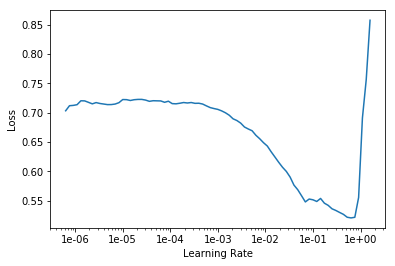

In [51]:
learn.recorder.plot()

In [52]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.314921,0.601808,0.766667,00:18


In [0]:
def predict(test,learn):
  predictions=[]
  for index, row in test.iterrows():
    p=learn.predict(row['text'])
    #print((row['label'],str(p[0])))
    predictions.append((row['text'],str(row['label']),str(p[0])))
  dfpred = pd.DataFrame(predictions)
  dfpred.columns=['text','label','prediction']
  match=dfpred[(dfpred['label']==dfpred['prediction'])]
  #match.head()
  print((dfpred.shape[0], match.shape[0],match.shape[0]/dfpred.shape[0]))

In [54]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.238565,0.324107,0.872222,00:18


In [55]:
learn.unfreeze()
learn.fit_one_cycle(8, slice(5e-3/(2.6**4),5e-03), moms=(0.8,0.7))



epoch,train_loss,valid_loss,accuracy,time
0,0.206090,0.255552,0.894444,00:34
1,0.195511,0.235158,0.913889,00:34
2,0.189316,0.164206,0.936111,00:34
3,0.182219,0.162945,0.936111,00:34
4,0.165859,0.150074,0.944444,00:34
5,0.151695,0.149489,0.947222,00:34
6,0.150001,0.136588,0.958333,00:34
7,0.150121,0.142545,0.950000,00:34


In [56]:
predict(test,learn)

(200, 190, 0.95)


In [57]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.172106,0.138633,0.955556,00:34
1,0.149674,0.150126,0.947222,00:34
2,0.166108,0.133021,0.969444,00:34
3,0.148738,0.122831,0.972222,00:34
4,0.150646,0.130273,0.969444,00:34
5,0.146506,0.121721,0.980556,00:34
6,0.136150,0.118383,0.980556,00:34
7,0.118151,0.118907,0.980556,00:34
8,0.126805,0.117805,0.972222,00:34
9,0.124446,0.120026,0.980556,00:34


In [58]:
predict(test,learn)

(200, 192, 0.96)


In [59]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.118121,0.117721,0.980556,00:34
1,0.126455,0.125232,0.975000,00:34
2,0.121120,0.117948,0.980556,00:34
3,0.113152,0.114259,0.980556,00:33
4,0.111690,0.118980,0.969444,00:34
5,0.106545,0.113649,0.977778,00:34
6,0.111157,0.109687,0.972222,00:34
7,0.113179,0.115343,0.980556,00:34
8,0.104767,0.113053,0.975000,00:34
9,0.098531,0.115902,0.969444,00:34


In [60]:
predict(test,learn)

(200, 195, 0.975)


In [61]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.105980,0.125903,0.966667,00:34
1,0.098555,0.123829,0.972222,00:34
2,0.097534,0.136573,0.972222,00:34
3,0.084794,0.120455,0.977778,00:34
4,0.082712,0.135423,0.955556,00:34
5,0.085116,0.137325,0.961111,00:34
6,0.079329,0.152948,0.950000,00:34
7,0.081602,0.150520,0.941667,00:34
8,0.088679,0.157054,0.947222,00:34
9,0.084992,0.164828,0.938889,00:34


In [62]:
predict(test,learn)

(200, 197, 0.985)


In [63]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.088219,0.152464,0.955556,00:34
1,0.077734,0.159506,0.947222,00:34
2,0.078484,0.177975,0.938889,00:34
3,0.092323,0.195297,0.927778,00:34
4,0.088257,0.201376,0.911111,00:34
5,0.074493,0.190406,0.919444,00:34
6,0.072699,0.154365,0.955556,00:34
7,0.079162,0.131340,0.975000,00:34
8,0.081601,0.160498,0.955556,00:34
9,0.079172,0.147688,0.966667,00:34


In [64]:
predict(test,learn)

(200, 196, 0.98)


In [65]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.061611,0.146816,0.961111,00:34
1,0.064703,0.141978,0.969444,00:34
2,0.067908,0.148788,0.958333,00:34
3,0.075566,0.139172,0.969444,00:34
4,0.070505,0.166067,0.950000,00:34
5,0.075270,0.201654,0.922222,00:34
6,0.073915,0.138977,0.972222,00:34
7,0.071327,0.147902,0.966667,00:34
8,0.069510,0.127475,0.977778,00:34
9,0.065762,0.140784,0.972222,00:34


In [66]:
predict(test,learn)

(200, 196, 0.98)


In [67]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.066511,0.139675,0.969444,00:34
1,0.059532,0.144545,0.963889,00:34
2,0.057816,0.126000,0.975000,00:34
3,0.066314,0.165148,0.952778,00:34
4,0.066282,0.146695,0.975000,00:34
5,0.070032,0.195907,0.952778,00:34
6,0.066421,0.161053,0.966667,00:34
7,0.070677,0.160216,0.966667,00:34
8,0.066685,0.121603,0.980556,00:34
9,0.065864,0.128877,0.980556,00:34


In [68]:
predict(test,learn)

(200, 197, 0.985)


In [69]:
learn.fit_one_cycle(32, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.059147,0.151267,0.966667,00:34
1,0.058318,0.155034,0.963889,00:34
2,0.052385,0.156040,0.963889,00:34
3,0.056510,0.149714,0.966667,00:34
4,0.065443,0.147348,0.969444,00:34
5,0.057042,0.138193,0.972222,00:34
6,0.063522,0.121567,0.980556,00:34
7,0.052620,0.128852,0.972222,00:34
8,0.061132,0.143088,0.966667,00:34
9,0.064802,0.144926,0.969444,00:34


In [70]:
predict(test,learn)

(200, 196, 0.98)


In [71]:
learn.fit_one_cycle(32, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.045369,0.126681,0.972222,00:34
1,0.054047,0.118865,0.975000,00:34
2,0.061559,0.116678,0.980556,00:34
3,0.057577,0.117014,0.977778,00:34
4,0.060699,0.114739,0.977778,00:34
5,0.064683,0.113595,0.977778,00:34
6,0.061278,0.127906,0.972222,00:34
7,0.064899,0.123083,0.975000,00:34
8,0.059612,0.111814,0.977778,00:34
9,0.055252,0.114957,0.980556,00:34


In [72]:
predict(test,learn)

(200, 196, 0.98)


In [73]:
learn.fit_one_cycle(32, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.047213,0.121982,0.972222,00:34
1,0.048887,0.108701,0.977778,00:34
2,0.061063,0.109392,0.977778,00:34
3,0.056153,0.107902,0.977778,00:34
4,0.047090,0.110308,0.977778,00:34
5,0.054735,0.109821,0.977778,00:34
6,0.058492,0.111487,0.977778,00:34
7,0.054571,0.109225,0.977778,00:34
8,0.051773,0.111278,0.975000,00:34
9,0.051290,0.106607,0.980556,00:34


In [74]:
predict(test,learn)

(200, 197, 0.985)


In [75]:
learn.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(72, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(72, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.8)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Dropout(p=0.1)
      (6): Linear(in_features=50, out_features=2, bias=True)
    )
  )
)